In [1]:
import distl
import numpy as np

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = distl.mvgaussian([5,10, 12], 
                         np.array([[ 2,  1, -1], 
                                   [ 1,  2,  1], 
                                   [-1,  1,  2]]),
                         allow_singular=True,
                         label=['a', 'b', 'c'])

We can then easily access the means and covariances and see that they exactly match what we set.

In [3]:
#mvg.means

In [4]:
#mvg.covariances

In [5]:
mvg.sample()

array([ 2.63014317,  7.38774056, 11.75759739])

In [6]:
mvg.sample(size=5)

array([[ 5.27189408,  9.63739395, 11.36549987],
       [ 7.46142647, 13.46289723, 13.00147076],
       [ 3.72960126,  9.5686646 , 12.83906334],
       [ 5.86368351,  7.36686653,  8.50318302],
       [ 3.56832094, 11.62332563, 15.05500469]])

and plotting will now show a corner plot (if [corner](https://corner.readthedocs.io/en/latest/) is installed)

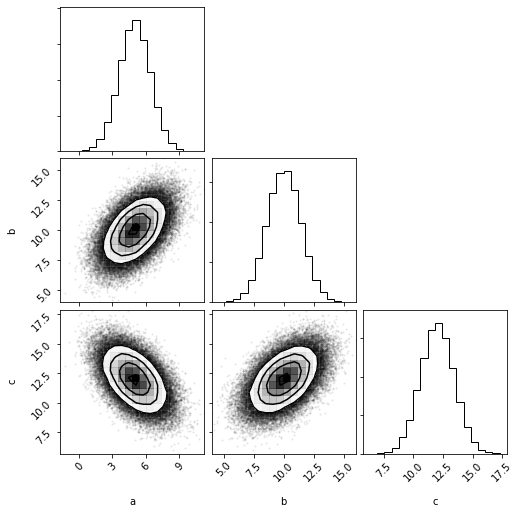

In [7]:
fig = mvg.plot(show=True)

we can now convert this multivariate gaussian distribution into a [multivariate histogram](../api/MVHistogram.md) distribution

In [23]:
mvh = mvg.to_mvhistogram(bins=15)

In [24]:
mvh.ppf(0.5)

array([ 4.99483284,  9.65265217, 10.4296969 ])

In [25]:
#import numpy as _np
#unraveled_index_rem = np.array([0.43468699])
#print((unraveled_index_rem * 1000).astype(int))

#np.unravel_index((unraveled_index_rem * 1000).astype(int), mvh.density.shape) / np.asarray(mvh.density.shape)

In [26]:
#import numpy as _np
#_np.unravel_index(int(0.82861676*1000), mvh.density.shape)

In [30]:
#mvh.sample()

In [31]:
#mvh.sample(size=100).shape

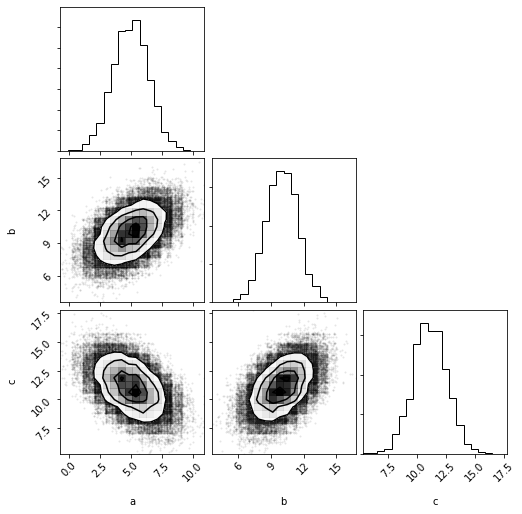

In [29]:
fig = mvh.plot(show=True, size=1e6)

In [15]:
np.asarray(mvh.density.shape)

array([20, 20, 20])

In [16]:
mvh.ppf(0.1)

array([ 3.58302681,  7.36823747, 10.159568  ])

Now if we access the means and covariances, we'll see that they are slightly different due to the binning.

In [17]:
mvh.calculate_means()

array([ 4.98360156,  9.98022904, 11.31418106])

In [18]:
mvh.calculate_covariances()

array([[ 2.07260458,  0.98462635, -1.006762  ],
       [ 0.98462635,  2.06760946,  1.00037412],
       [-1.006762  ,  1.00037412,  2.08062765]])

If we convert back to a multivariate gaussian, these are the means and covariances that will be adopted.

In [19]:
mvhg = mvh.to_mvgaussian()

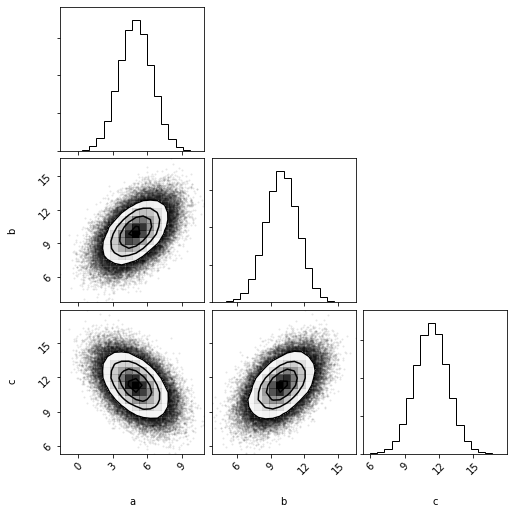

In [20]:
fig = mvhg.plot(show=True)

In [21]:
mvhg.mean

array([ 4.98735074,  9.98937181, 11.31818563])

In [22]:
mvhg.cov

array([[ 2.07612307,  1.00799532, -0.99201949],
       [ 1.00799532,  2.10222622,  1.00783382],
       [-0.99201949,  1.00783382,  2.07745617]])